# Dependências 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from utils import plot

%matplotlib inline

print(tf.__version__)

1.12.0


# Hello, Tensorflow!

In [5]:
hello = tf.constant('Hello, Tensorflow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, Tensorflow!'


# Operações Básicas

In [7]:
a = tf.constant(2)
b = tf.constant(3)

print(a + b)
print(a * b)

Tensor("add_1:0", shape=(), dtype=int32)
Tensor("mul:0", shape=(), dtype=int32)


In [15]:
with tf.Session() as sess:
    print('adição')
    print(sess.run(a + b))
    print(sess.run(tf.add(a, b)))
    print()
    
    print('subtração')    
    print(sess.run(a - b))
    print(sess.run(tf.subtract(a, b)))
    print()
    
    print('multiplicação')    
    print(sess.run(a * b))
    print(sess.run(tf.multiply(a, b)))
    print()
    
    print('divisão')    
    print(sess.run(a / b))
    print(sess.run(tf.div(a, b)))
    print(sess.run(tf.divide(a, b)))
    print()
    
    print('potenciação')
    print(sess.run(a ** b))
    print(sess.run(tf.pow(a, b)))
    print()

adição
5
5

subtração
-1
-1

multiplicação
6
6

divisão
0.6666666666666666
0
0.6666666666666666

potenciação
8
8



In [23]:
matrix1 = tf.constant([[1.0, 2.0]])
matrix2 = tf.constant([[3.0], [4.0]])
product = tf.matmul(matrix1, matrix2)
multiply = tf.multiply(matrix1, matrix2)

with tf.Session() as sess:
    print(sess.run(product))
    print(sess.run(multiply))

[[11.]]
[[3. 6.]
 [4. 8.]]


In [24]:
vector1 = tf.constant([5.0, 6.0])
vector2 = tf.constant([7.0, 8.0])

with tf.Session() as sess:
    print(sess.run(tf.multiply(vector1, vector2)))
    print(sess.run(tf.multiply(matrix1, vector1)))
    print(sess.run(tf.multiply(matrix2, vector2)))

[35. 48.]
[[ 5. 12.]]
[[21. 24.]
 [28. 32.]]


# Tipos de Variáveis 

### Variables

In [30]:
v1 = tf.Variable(2.0)
v2 = tf.Variable([1.0, 2.0, 3.0])

print(v1)
print(v2)

<tf.Variable 'Variable_3:0' shape=() dtype=float32_ref>
<tf.Variable 'Variable_4:0' shape=(3,) dtype=float32_ref>


In [33]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(v1 * v2))

[2. 4. 6.]


### Placeholders

In [27]:
a = tf.placeholder(tf.int32)
b = tf.placeholder(tf.int32)

add = tf.add(a, b)
mul = tf.multiply(a, b)

with tf.Session() as sess:
    print(sess.run(add, feed_dict={a: 2, b: 3}))
    print(sess.run(mul, feed_dict={a: 4, b: 5}))

5
20


# Eager execution

In [2]:
tf.enable_eager_execution()

In [8]:
a = tf.constant(2)
b = tf.constant(3)

print('a + b = {}'.format(a + b))
print('a * b = {}'.format(a * b))

a + b = 5
a * b = 6


In [15]:
a = tf.constant([[2.0, 1.0], [1.0, 0.0]], dtype=tf.float32)
b = np.array([[3.0, 0.0], [5.0, 1.0]], dtype=np.float32)

add = a + b
mul = tf.matmul(a, b)

print(add)
print(mul)

tf.Tensor(
[[5. 1.]
 [6. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[11.  1.]
 [ 3.  0.]], shape=(2, 2), dtype=float32)


# Exemplos

### Classificação

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


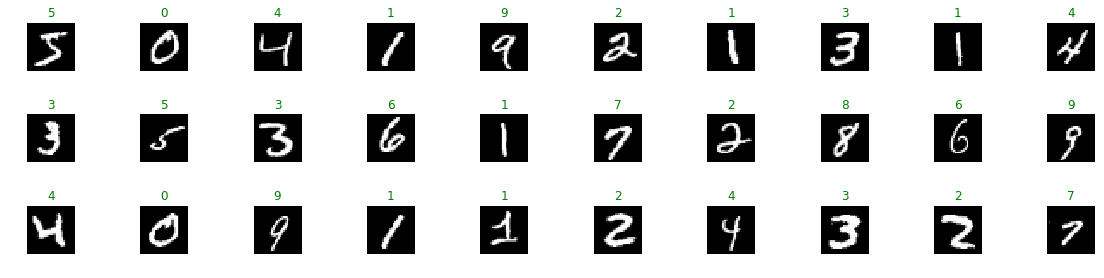

In [3]:
plot.image_batch(x_train[:30], y_train[:30])

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.3)
model.evaluate(x_test, y_test)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 12s 297us/step - loss: 0.3014 - acc: 0.9133 - val_loss: 0.1875 - val_acc: 0.9459
Epoch 2/5
42000/42000 [==============================] - 12s 281us/step - loss: 0.1360 - acc: 0.9602 - val_loss: 0.1307 - val_acc: 0.9636
Epoch 3/5
42000/42000 [==============================] - 13s 319us/step - loss: 0.0938 - acc: 0.9720 - val_loss: 0.1219 - val_acc: 0.9638
Epoch 4/5
42000/42000 [==============================] - 13s 300us/step - loss: 0.0677 - acc: 0.9794 - val_loss: 0.1146 - val_acc: 0.9663
Epoch 5/5
10000/10000 [==============================] - 1s 50us/step


[0.09099772147266194, 0.9724]